**1. Install OpenCV**

In [ ]:
!pip install opencv-python-headless

**2. Import Libraries**

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def display_image(img, title="Image"):
  plt.figure(figsize=(6,3))
  plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
  plt.title(title)
  plt.axis("off")
  plt.show()

def display_images(img1, img2, title1="Image 1", title2="Image 2"):
  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plt.imshow(cv2.cvtColor(img1,cv2.COLOR_BGR2RGB))
  plt.title(title1)
  plt.axis("off")

  plt.subplot(1,2,2)
  plt.imshow(cv2.cvtColor(img2,cv2.COLOR_BGR2RGB))
  plt.title(title2)
  plt.axis("off")
  plt.show()


**3. Load Image**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


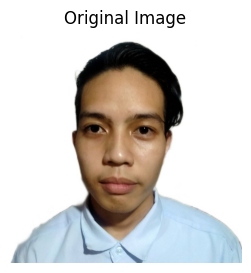

In [ ]:
image_path = '/content/drive/MyDrive/photo.jpg'  # Replace with your image path
image = cv2.imread(image_path)
display_image(image, "Original Image")

In [ ]:
'''
from google.colab import files
from io import BytesIO
from PIL import Image

uploaded = files.upload()
image_path = next(iter(uploaded))
image = Image.open(BytesIO(uploaded[image_path]))
image = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)

display_image(image,"Original Image")
'''

'\nfrom google.colab import files\nfrom io import BytesIO\nfrom PIL import Image\n\nuploaded = files.upload()\nimage_path = next(iter(uploaded))\nimage = Image.open(BytesIO(uploaded[image_path]))\nimage = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)\n\ndisplay_image(image,"Original Image")\n'

**1. Exercise 1: Scaling and Orientation**

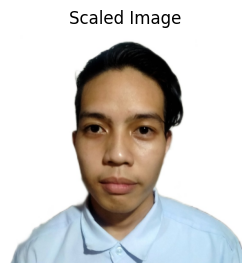

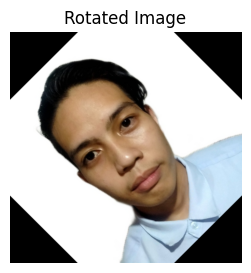

In [ ]:
def scale_image(image, scale_factor):
  height, width = image.shape[:2]
  scale_img = cv2.resize(image,(int(width * scale_factor), int(height * scale_factor)), interpolation = cv2.INTER_LINEAR)
  return scale_img

def rotate_image(image, angle):
  height, width = image.shape[:2]
  center = (width//2,height//2)
  matrix = cv2.getRotationMatrix2D(center,angle,1)
  rotated_image = cv2.warpAffine(image,matrix,(width,height))
  return rotated_image

scaled_image = scale_image(image, 0.5)
display_image(scaled_image,"Scaled Image")

rotated_image = rotate_image(image, 45)
display_image(rotated_image,"Rotated Image")



**Exercise 2: Blurring Techniques**

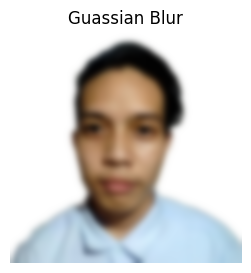

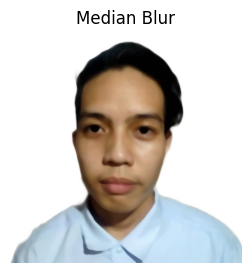

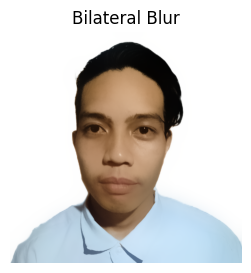

In [ ]:
guassian_blur = cv2.GaussianBlur(image,(61,61),0)
display_image(guassian_blur,"Guassian Blur")

median_blur = cv2.medianBlur(image,11)
display_image(median_blur,"Median Blur")

bilateral_blur = cv2.bilateralFilter(image,99,75,75)
display_image(bilateral_blur,"Bilateral Blur")


**3. Edge Detection using Canny**


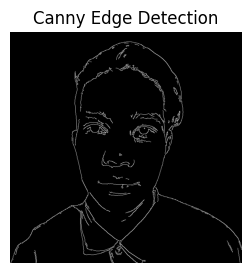

In [ ]:
edge = cv2.Canny(image,75 ,150)
display_image(edge, "Canny Edge Detection")

**Exercise 4: Basic Image Processor (Interactive)**

Enter action (scale, rotate, gaussian_blur, median_blur, canny): canny


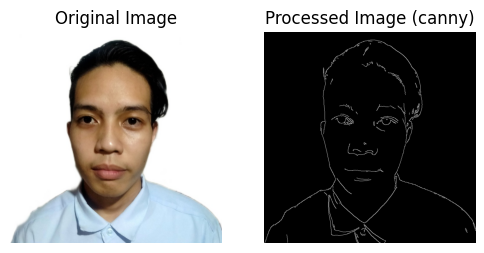

'\nThis allows users to enter their desired transformation interactively (via the\ninput() function). It processes the image and displays both the original and transformed versions side by side.\n'

In [ ]:
def process_image(img, action):
  if action == 'scale':
    return scale_image(img, 0.5)
  elif action == 'rotate':
    return rotate_image(img, 45)
  elif action == 'gaussian_blur':
    return cv2.GaussianBlur(img, (5, 5), 0)
  elif action == 'median_blur':
    return cv2.medianBlur(img, 5)
  elif action == 'canny':
    return cv2.Canny(img, 100, 200)
  else:
    return img

"""
process_image(): This function allows users to specify an image transformation (scaling, rotation, blurring, or edge detection). Depending on the action passed, it will apply the corresponding image processing technique and return the processed image.
"""
action = input("Enter action (scale, rotate, gaussian_blur, median_blur, canny): ")
processed_image = process_image(image, action)
display_images(image, processed_image, "Original Image", f"Processed Image ({action})")
"""
This allows users to enter their desired transformation interactively (via the
input() function). It processes the image and displays both the original and transformed versions side by side.
"""

**Exercise 5: Comparison of Filtering Techniques**

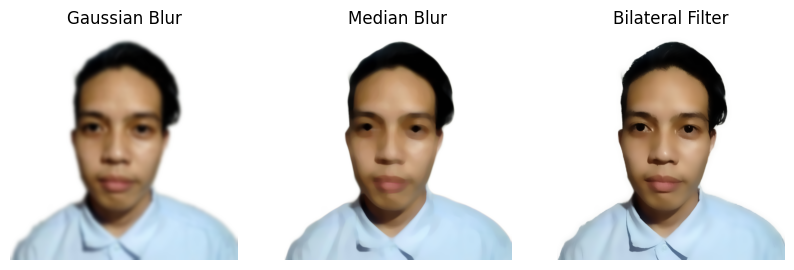

'\nExplanation: This displays the images processed by different filtering techniques (Gaussian, Median, and Bilateral) side by side for comparison.\n'

In [ ]:
# Applying Gaussian, Median, and Bilateral filters
gaussian_blur = cv2.GaussianBlur(image, (31, 31), 0)
median_blur = cv2.medianBlur(image, 21)
bilateral_filter = cv2.bilateralFilter(image, 25, 75, 75)
"""
cv2.bilateralFilter(): This filter smooths the image while keeping edges sharp, unlike Gaussian or median filters. It’s useful for reducing noise while preserving details.
"""
# Display the results for comparison
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(gaussian_blur, cv2.COLOR_BGR2RGB))
plt.title("Gaussian Blur")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(median_blur, cv2.COLOR_BGR2RGB))
plt.title("Median Blur")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(bilateral_filter, cv2.COLOR_BGR2RGB))
plt.title("Bilateral Filter")
plt.axis("off")

plt.show()

"""
Explanation: This displays the images processed by different filtering techniques (Gaussian, Median, and Bilateral) side by side for comparison.
"""

**Conclusion**


You can implement the above code in Google Colab to carry out scaling, rotation, blurring, and edge detection tasks using OpenCV. These exercises will help your students understand how different image processing techniques work in practice.

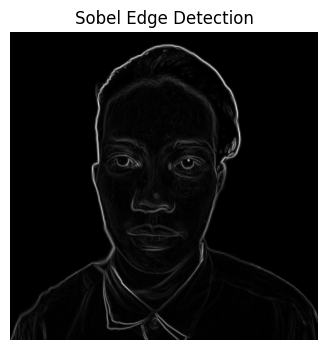

In [ ]:
# Sobel Edge Detection
def sobel_edge_detection(img):
  # Convert to grayscale
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

  # Sobel edge detection in the x direction
  sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=5)

  # Sobel edge detection in the y direction
  sobely = cv2.Sob l(gray, cv2.CV_64F, 0, 1, ksize=5)

  # Combine the two gradients
  sobel_combined = cv2.magnitude(sobelx, sobely)

  return sobel_combined

# Apply Sobel edge detection to the uploaded image
sobel_edges = sobel_edge_detection(image)
plt.figure(figsize=(8,4))
plt.imshow(sobel_edges, cmap='gray')
plt.title("Sobel Edge Detection")
plt.axis('off')
plt.show()

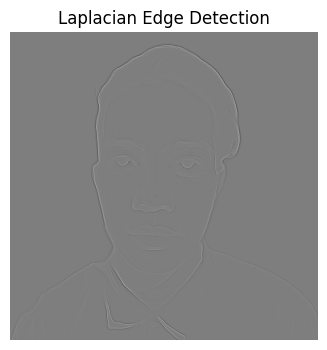

In [ ]:
# Laplacian Edge Detection
def laplacian_edge_detection(img):
  # Convert to grayscale
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

  # Apply Laplacian operator
  laplacian = cv2.Laplacian(gray, cv2.CV_64F)

  return laplacian

# Apply Laplacian edge detection to the uploaded image
laplacian_edges = laplacian_edge_detection(median_blur)
plt.figure(figsize=(8,4))
plt.imshow(laplacian_edges, cmap='gray')
plt.title("Laplacian Edge Detection")
plt.axis('off')
plt.show()

In [ ]:
# Prewitt Edge Detection
def prewitt_edge_detection(img):
  # Convert to grayscale
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  # Prewitt operator kernels for x and y directions
  kernelx = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]], dtype=int)
  kernely = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]], dtype=int)
  # Applying the Prewitt operator
  prewittx = cv2.filter2D(gray, cv2.CV_64F, kernelx)
  prewitty = cv2.filter2D(gray, cv2.CV_64F, kernely)
  # Combine the x and y gradients by converting to floating point
  prewitt_combined = cv2.magnitude(prewittx, prewitty)
  return prewitt_combined

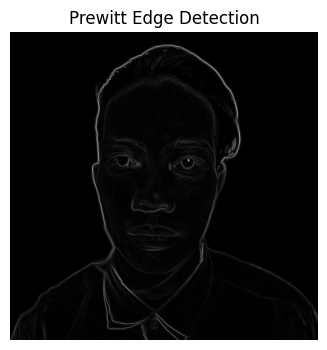

In [ ]:
# Apply Prewitt edge detection to the uploaded image
prewitt_edges = prewitt_edge_detection(image)
plt.figure(figsize=(8,4))
plt.imshow(prewitt_edges, cmap='gray')
plt.title("Prewitt Edge Detection")
plt.axis('off')
plt.show()

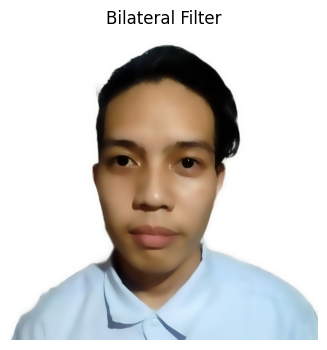

In [ ]:
# Bilateral Filter
def bilateral_blur(img):
  bilateral = cv2.bilateralFilter(img, 21, 75, 75)
  return bilateral

# Apply Bilateral filter to the uploaded image
bilateral_blurred = bilateral_blur(image)
plt.figure(figsize=(8,4))
plt.imshow(cv2.cvtColor(bilateral_blurred, cv2.COLOR_BGR2RGB))
plt.title("Bilateral Filter")
plt.axis('off')
plt.show()

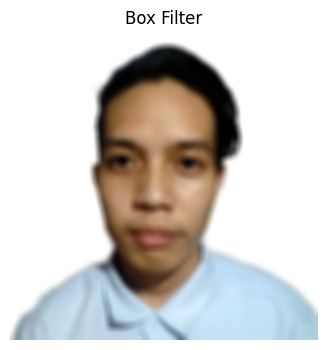

In [ ]:
# Box Filter
def box_blur(img):
  box = cv2.boxFilter(img, -1, (18, 18))
  return box

# Apply Box filter to the uploaded image
box_blurred = box_blur(image)
plt.figure(figsize=(8,4))
plt.imshow(cv2.cvtColor(box_blurred, cv2.COLOR_BGR2RGB))
plt.title("Box Filter")
plt.axis('off')
plt.show()

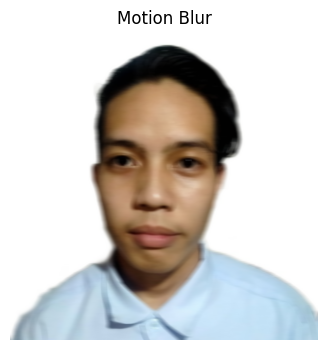

In [ ]:
# Motion Blur
def motion_blur(img):
  # Create motion blur kernel (size 15x15)
  kernel_size = 15
  kernel = np.zeros((kernel_size, kernel_size))
  kernel[int((kernel_size - 1) / 2), :] = np.ones(kernel_size)
  kernel = kernel / kernel_size

  # Apply motion blur
  motion_blurred = cv2.filter2D(img, -1, kernel)
  return motion_blurred

# Apply Motion blur to the uploaded image
motion_blurred = motion_blur(image)
plt.figure(figsize=(8,4))
plt.imshow(cv2.cvtColor(motion_blurred, cv2.COLOR_BGR2RGB))
plt.title("Motion Blur")
plt.axis('off')
plt.show()

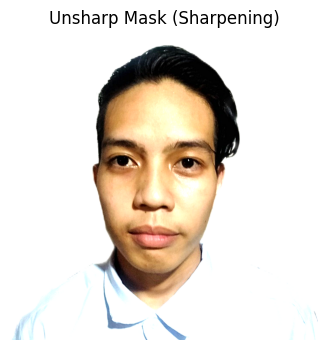

In [ ]:
# Unsharp Masking (Sharpening)
def unsharp_mask(img):
  # Create a Gaussian blur version of the image
  blurred = cv2.GaussianBlur(img, (9, 9), 10.0)

  # Sharpen by adding the difference between the original and the blurred image
  sharpened = cv2.addWeighted(img, 2, blurred, -0.5, 0)
  return sharpened

# Apply Unsharp Masking to the uploaded image
sharpened_image = unsharp_mask(image)
plt.figure(figsize=(8,4))
plt.imshow(cv2.cvtColor(sharpened_image, cv2.COLOR_BGR2RGB))
plt.title("Unsharp Mask (Sharpening)")
plt.axis('off')
plt.show()

In [ ]:
# Update process_image function to include new blurring techniques
def process_image(img, action):
  if action == 'scale':
    return scale_image(img, 0.5)
  elif action == 'rotate':
    return rotate_image(img, 45)
  elif action == 'gaussian_blur':
    return cv2.GaussianBlur(img, (5, 5), 0)
  elif action == 'median_blur':
    return cv2.medianBlur(img, 5)
  elif action == 'canny':
    return cv2.Canny(img, 100, 200)
  elif action == 'sobel':
    return sobel_edge_detection(img).astype(np.uint8)
  elif action == 'laplacian':
    return laplacian_edge_detection(img).astype(np.uint8)
  elif action == 'prewitt':
    return prewitt_edge_detection(img).astype(np.uint8)
  elif action == 'bilateral_blur':
    return bilateral_blur(img)
  elif action == 'box_blur':
    return box_blur(img)
  elif action == 'motion_blur':
    return motion_blur(img)
  elif action == 'unsharp_mask':
    return unsharp_mask(img)
  else:
    return img

Enter action (scale, rotate, gaussian_blur, median_blur, canny, sobel, laplacian, prewitt, bilateral_blur, box_blur, motion_blur, unsharp_mask): sobel


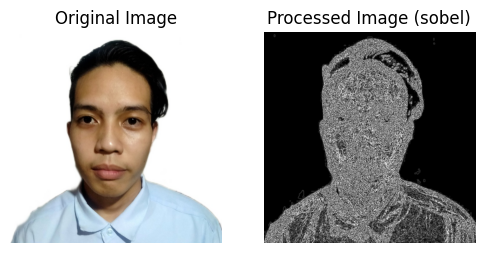

In [ ]:
# Add new blurring options for interactive processing
action = input("Enter action (scale, rotate, gaussian_blur, median_blur, canny, sobel, laplacian, prewitt, bilateral_blur, box_blur, motion_blur, unsharp_mask): " )
processed_image = process_image(image, action)
display_images(image, processed_image, "Original Image", f"Processed Image ({action})")

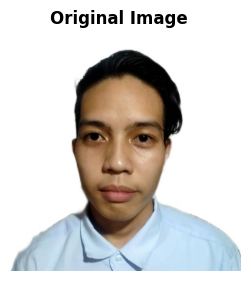

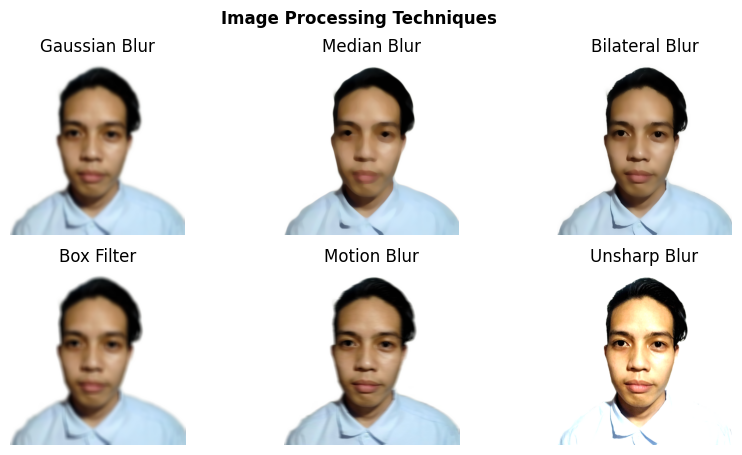

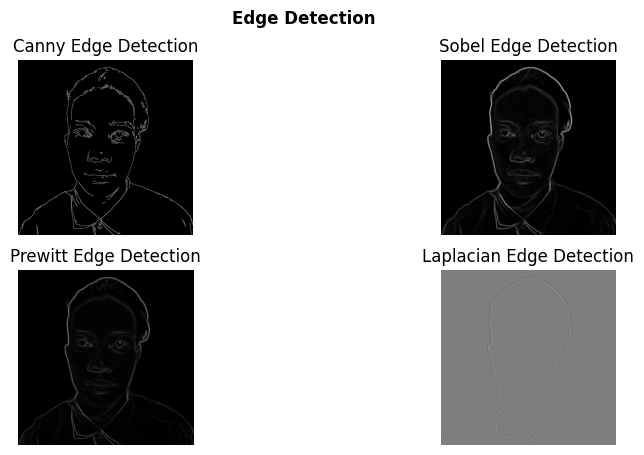

In [ ]:
# Display the results for comparison
plt.figure(figsize=(5, 3))
plt.suptitle("Original Image", fontweight='bold')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis("off")

plt.figure(figsize=(10, 5))
plt.suptitle("Image Processing Techniques", fontweight='bold')

plt.subplot(2, 3, 1)
plt.imshow(cv2.cvtColor(gaussian_blur, cv2.COLOR_BGR2RGB))
plt.title("Gaussian Blur")
plt.axis("off")

plt.subplot(2, 3, 2)
plt.imshow(cv2.cvtColor(median_blur, cv2.COLOR_BGR2RGB))
plt.title("Median Blur")
plt.axis("off")

plt.subplot(2, 3, 3)
plt.imshow(cv2.cvtColor(bilateral_blurred, cv2.COLOR_BGR2RGB))
plt.title("Bilateral Blur")
plt.axis("off")

plt.subplot(2, 3, 4)
plt.imshow(cv2.cvtColor(box_blurred, cv2.COLOR_BGR2RGB))
plt.title("Box Filter")
plt.axis("off")

plt.subplot(2, 3, 5)
plt.imshow(cv2.cvtColor(motion_blurred, cv2.COLOR_BGR2RGB))
plt.title("Motion Blur")
plt.axis("off")

plt.subplot(2, 3, 6)
plt.imshow(cv2.cvtColor(sharpened_image, cv2.COLOR_BGR2RGB))
plt.title("Unsharp Blur")
plt.axis("off")

plt.show()

plt.figure(figsize=(10, 5))
plt.suptitle("Edge Detection", fontweight='bold')

plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(edge, cv2.COLOR_BGR2RGB))
plt.title("Canny Edge Detection")
plt.axis("off")

plt.subplot(2, 2, 2)
plt.imshow(sobel_edges, cmap="gray")
plt.title("Sobel Edge Detection")
plt.axis("off")

plt.subplot(2, 2, 3)
plt.imshow(prewitt_edges, cmap="gray")
plt.title("Prewitt Edge Detection")
plt.axis("off")

plt.subplot(2, 2, 4)
plt.imshow(laplacian_edges, cmap="gray")
plt.title("Laplacian Edge Detection")
plt.axis("off")

plt.show()

